---

# `Instruções para o teste`

## ⚠️ Importante

Antes de iniciar, não esqueça de renomear esse documento substituindo o texto **SEU_NOME** no título com o nome de quem for resolver.

Deixe as respostas bem sinalizadas e comentadas e mencionando a qual questão se refere.

Fique à vontade para utilizar quantas células forem necessárias.

<br><br>

## 📖 Recursos Permitidos
✅ Documentação, sites, fóruns  
❌ Inteligências Artificiais (ChatGPT, Claude, etc.)

<br><br>

## 📤 Instruções para Entrega

**Ao finalizar o teste** volte a este passo e execute a célula abaixo.

**Envie o arquivo gerado e o arquivo do seu notebook para o e-mail:** `mateus.camacho@tdwbi.com.br`

- Arquivo gerado: `historico_exec.txt` <br>
- Seu notebook: `teste_spark_SEU_NOME.ipynb`


In [51]:
with open('/content/historico_exec.txt', 'w') as f:
    for i, cmd in enumerate(In):
        if cmd.strip():
            f.write(f"\n\nIn[{i}]:\n{cmd}\n\n")

# Baixar arquivo
from google.colab import files
files.download('/content/historico_exec.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# `Questões e Contexto`

## 📁 Contexto

No diretório raiz desse documento, existem os três arquivos que serão necessários para a conclusão dessa atividade. Em caso de dúvidas, a pasta de se encontra no desktop dessa máquina na pasta 'pyspark_test'.

Os dados são fictícios e compreendem uma simulação de um cenário de uma loja de departamentos, para isso temos os arquivos com as seguintes informações:
- **users.csv** → Dados dos clientes/usuários da loja
- **sales.csv** → Dados das vendas
- **products.json** → Dados de cadastro dos produtos

<br><br>

## 📝 Questões

A atividade consiste nas questões a seguir:

**1.** Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

**2.** Declare um novo dataframe com o valor total gasto por cliente.

**3.** Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

**4.** Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

**5.** Calcular a média de faturamento por cliente e o desvio padrão.

**6.** Classificar os clientes em três categorias: silver, gold, platinum
- **platinum:** clientes que gastaram mais que a média de faturamento por cliente;
- **gold:** clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;
- **silver:** clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

**7.** Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

---

# `Configuração do ambiente`

**Execute as células abaixo antes de iniciar o teste.**

Os arquivos serão criados automaticamente e estarão disponíveis no ícone de pasta do menu lateral (conforme imagem abaixo) ou na pasta **content**.

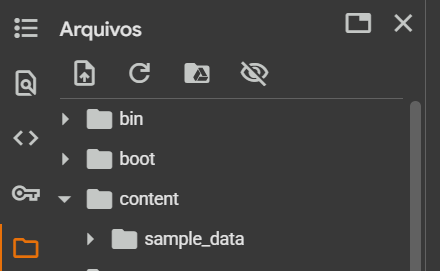


In [74]:
### IMPORTANDO ARQUIVOS QUE SERÃO USADOS NO TESTE ###

!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json -O products.json
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv -O sales.csv
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/users.csv -O users.csv

path_products = "/content/products.json"
path_sales = "/content/sales.csv"
path_users = "/content/users.csv"

--2025-11-27 21:14:02--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3186 (3.1K) [text/plain]
Saving to: ‘products.json’

products.json       100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-11-27 21:14:03 (31.5 MB/s) - ‘products.json’ saved [3186/3186]

--2025-11-27 21:14:03--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24411 (24K) [text/plain]


In [14]:
### IMPORTANDO BIBLIOTECAS NECESSÁRIAS ###

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [15]:
### INSTANCIANDO SPARK ###

spark = SparkSession.builder.appName('test-spark').getOrCreate()

---

# Seu teste começa aqui 🍀 Boa sorte!

**Importação Da biblioteca Spark**

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('teste_spark').getOrCreate()

**Criando Dataframes para execução dos códigos e views para utilização do SparkSQL**

In [3]:
df_products = spark.read.json("/content/products.json")
df_products.createOrReplaceTempView("products")
df_products.show()

+-------+--------------------+----------+
|  price|             product|product_id|
+-------+--------------------+----------+
| $86.50|         Camisa Polo|         1|
|$112.11|         Calça Jeans|         2|
|$100.19|    Vestido de Verão|         3|
| $82.38|     Tênis Esportivo|         4|
|$101.50|     Camiseta Básica|         5|
|$108.01|           Saia Midi|         6|
|$100.37|Blusa de Manga Longa|         7|
|$122.81|Sapatos de Salto ...|         8|
|$116.02|       Jaqueta Jeans|         9|
|$117.15|      Bolsa de Couro|        10|
| $86.50|        Shorts Jeans|        11|
|$117.88|   Casaco de Inverno|        12|
| $80.76|       Camisa Social|        13|
|$101.77|     Blazer Feminino|        14|
| $86.67|  Sandálias de Verão|        15|
|$124.43|        Calça Social|        16|
|$112.08|      Blusa de Alças|        17|
|$105.47|      Cinto de Couro|        18|
|$110.06|             Macacão|        19|
|$121.20|    Camisola de Seda|        20|
+-------+--------------------+----

In [4]:
df_sales = spark.read.csv("/content/sales.csv", header=True, inferSchema=True)
df_sales.createOrReplaceTempView("sales")
df_sales.show()

+-------+----------+----------+---------+----+
|sale_id|      date|product_id|client_id|qtde|
+-------+----------+----------+---------+----+
|      1|13/06/2022|        30|      223|   2|
|      2|16/11/2022|        23|      175|   2|
|      3|18/08/2022|        29|      184|   2|
|      4|13/03/2022|        31|      194|   1|
|      5|14/12/2022|        13|      221|   2|
|      6|18/01/2022|        26|      206|   1|
|      7|12/10/2022|        28|      123|   2|
|      8|15/06/2022|        39|      269|   2|
|      9|15/02/2022|        36|      179|   3|
|     10|06/12/2022|        41|      148|   1|
|     11|30/04/2022|        34|       81|   1|
|     12|05/04/2022|        48|       98|   3|
|     13|24/03/2022|        24|      180|   1|
|     14|20/11/2022|         1|       97|   3|
|     15|23/03/2022|        12|      270|   2|
|     16|28/11/2022|        25|      128|   1|
|     17|24/04/2022|        49|      165|   2|
|     18|21/10/2022|        28|       18|   3|
|     19|01/1

In [16]:
df_users = spark.read.csv("/content/users.csv", header=True, inferSchema=True)
df_users.createOrReplaceTempView("users")
df_users.show()

+---------+-------------------+--------------------+------+--------------+----------------+
|client_id|               name|               email|gender|         login|        password|
+---------+-------------------+--------------------+------+--------------+----------------+
|        1|   Mitch Kilpatrick|mkilpatrick0@cdc.gov|     M|  mkilpatrick0|      uE9+F7h5*P|
|        2|          Kit Kyncl|kkyncl1@miitbeian...|     M|       kkyncl1|        nZ1>gR%L|
|        3|    Marylou Presman|mpresman2@twitter...|     F|     mpresman2|        aP2#@KQI|
|        4|   Gilberta Andrieu|gandrieu3@4shared...|     M|     gandrieu3|oN2/1oW(IPSNWwoW|
|        5|Tobiah Boughtflower|tboughtflower4@pa...|     M|tboughtflower4| hD7{HV(oHo'C&P.|
|        6|      Prent Clifton|  pclifton5@cnbc.com|     F|     pclifton5|      fF4$?1cViZ|
|        7|   Katinka Mosedill|  kmosedill6@loc.gov|     F|    kmosedill6|  yC9=dRM)1_ZuKp|
|        8|       Aime Cheyney|  acheyney7@gmpg.org|     F|     acheyney7|  dQ1&

**VERIFICANDO SCHEMAS**

In [6]:
df_products.printSchema()
df_sales.printSchema()
df_users.printSchema()

root
 |-- price: string (nullable = true)
 |-- product: string (nullable = true)
 |-- product_id: long (nullable = true)

root
 |-- sale_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- client_id: integer (nullable = true)
 |-- qtde: integer (nullable = true)

root
 |-- client_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- login: string (nullable = true)
 |-- password: string (nullable = true)



**ALETAR A COLUNA "PRICE" de STRING para Double e remover tudo que não é numero**

In [7]:
from pyspark.sql.functions import col, regexp_replace

df_products = df_products.withColumn(
    "price",
    regexp_replace(col("price"), "\\$", "")
)

df_products.show(20, truncate=False)
df_products.printSchema()


+------+---------------------+----------+
|price |product              |product_id|
+------+---------------------+----------+
|86.50 |Camisa Polo          |1         |
|112.11|Calça Jeans          |2         |
|100.19|Vestido de Verão     |3         |
|82.38 |Tênis Esportivo      |4         |
|101.50|Camiseta Básica      |5         |
|108.01|Saia Midi            |6         |
|100.37|Blusa de Manga Longa |7         |
|122.81|Sapatos de Salto Alto|8         |
|116.02|Jaqueta Jeans        |9         |
|117.15|Bolsa de Couro       |10        |
|86.50 |Shorts Jeans         |11        |
|117.88|Casaco de Inverno    |12        |
|80.76 |Camisa Social        |13        |
|101.77|Blazer Feminino      |14        |
|86.67 |Sandálias de Verão   |15        |
|124.43|Calça Social         |16        |
|112.08|Blusa de Alças       |17        |
|105.47|Cinto de Couro       |18        |
|110.06|Macacão              |19        |
|121.20|Camisola de Seda     |20        |
+------+---------------------+----

In [31]:
from pyspark.sql import functions as f


df_products = df_products.withColumn(
    "price",
    col("price").cast("double")
)

df_products.show(20, truncate=False)
df_products.createOrReplaceTempView("products")
df_products.printSchema()


+------+---------------------+----------+
|price |product              |product_id|
+------+---------------------+----------+
|86.5  |Camisa Polo          |1         |
|112.11|Calça Jeans          |2         |
|100.19|Vestido de Verão     |3         |
|82.38 |Tênis Esportivo      |4         |
|101.5 |Camiseta Básica      |5         |
|108.01|Saia Midi            |6         |
|100.37|Blusa de Manga Longa |7         |
|122.81|Sapatos de Salto Alto|8         |
|116.02|Jaqueta Jeans        |9         |
|117.15|Bolsa de Couro       |10        |
|86.5  |Shorts Jeans         |11        |
|117.88|Casaco de Inverno    |12        |
|80.76 |Camisa Social        |13        |
|101.77|Blazer Feminino      |14        |
|86.67 |Sandálias de Verão   |15        |
|124.43|Calça Social         |16        |
|112.08|Blusa de Alças       |17        |
|105.47|Cinto de Couro       |18        |
|110.06|Macacão              |19        |
|121.2 |Camisola de Seda     |20        |
+------+---------------------+----

**Mudando campo de data tabela sales**

In [35]:
from pyspark.sql import functions as f

df_sales = df_sales.withColumn('date', f.to_date("date","dd/mm/yyyy"))
df_sales.createOrReplaceTempView("sales")
df_sales.show()

+-------+----------+----------+---------+----+
|sale_id|      date|product_id|client_id|qtde|
+-------+----------+----------+---------+----+
|      1|2022-01-13|        30|      223|   2|
|      2|2022-01-16|        23|      175|   2|
|      3|2022-01-18|        29|      184|   2|
|      4|2022-01-13|        31|      194|   1|
|      5|2022-01-14|        13|      221|   2|
|      6|2022-01-18|        26|      206|   1|
|      7|2022-01-12|        28|      123|   2|
|      8|2022-01-15|        39|      269|   2|
|      9|2022-01-15|        36|      179|   3|
|     10|2022-01-06|        41|      148|   1|
|     11|2022-01-30|        34|       81|   1|
|     12|2022-01-05|        48|       98|   3|
|     13|2022-01-24|        24|      180|   1|
|     14|2022-01-20|         1|       97|   3|
|     15|2022-01-23|        12|      270|   2|
|     16|2022-01-28|        25|      128|   1|
|     17|2022-01-24|        49|      165|   2|
|     18|2022-01-21|        28|       18|   3|
|     19|2022

In [36]:
spark.sql("""
        SELECT
            SUM (price) as soma
        From
          products

""").show()

+-----------------+
|             soma|
+-----------------+
|5159.629999999999|
+-----------------+



**1. Declare um novo dataframe que mostre o nome do produto e o valor final da compra**

In [11]:

df_valor_final = spark.sql("""
          SELECT
            s.sale_id,
            p.product,
            p.price,
            s.qtde,
          coalesce(p.price * s.qtde, 0) as valor_total  -- Tratei valores nulos
          FROM
            sales s
          INNER JOIN
            products p
          ON s.product_id = p.product_id
          ORDER BY valor_total DESC

""").show()

+-------+----------------+------+----+-----------+
|sale_id|         product| price|qtde|valor_total|
+-------+----------------+------+----+-----------+
|    488|    Calça Social|124.43|   3|     373.29|
|    657|    Calça Social|124.43|   3|     373.29|
|    665|    Calça Social|124.43|   3|     373.29|
|    336|    Calça Social|124.43|   3|     373.29|
|    567|    Calça Social|124.43|   3|     373.29|
|    644|    Calça Social|124.43|   3|     373.29|
|    958|    Calça Social|124.43|   3|     373.29|
|    353|Jaqueta de Couro|124.17|   3|     372.51|
|    483|Jaqueta de Couro|124.17|   3|     372.51|
|    149|Jaqueta de Couro|124.17|   3|     372.51|
|    570|Jaqueta de Couro|124.17|   3|     372.51|
|    622|Jaqueta de Couro|124.17|   3|     372.51|
|    224|      Sapatilhas|123.33|   3|     369.99|
|    296|      Sapatilhas|123.33|   3|     369.99|
|    322|      Sapatilhas|123.33|   3|     369.99|
|    533|      Sapatilhas|123.33|   3|     369.99|
|    630|      Sapatilhas|123.3

**2. Declare um novo dataframe com o valor total gasto por cliente**

In [12]:
df_total_compras_clientes = spark.sql("""

            SELECT
                u.client_id,
                u.name,
                SUM(p.price * s.qtde) as preco_total
            FROM
                sales s
            inner join
                products p
            on
              p.product_id = s.product_id
            INnER Join
                users u
            on
                u.client_id = s.client_id
            GROUP BY
                u.client_id, u.name
            ORDER BY
                preco_total ASC

""").show()

+---------+-------------------+-----------+
|client_id|               name|preco_total|
+---------+-------------------+-----------+
|      141|         Zolly Cave|      82.64|
|       80|  Skipton Coldicott|      82.64|
|       76|      Brittne Weeds|      85.49|
|      294|        Blayne Sirr|      95.66|
|      197|    Richard Ruddick|      102.7|
|      214|        Kial Sheara|     105.47|
|       77|      Pepito Mocher|     108.96|
|      287|          Kym Beade|     110.27|
|       70|       Adelina Joel|     110.91|
|      278|   Cynthea Spensley|     112.08|
|      171|    Mohandis Duigan|     112.08|
|      254|      Lou Roobottom|     112.11|
|      253|Christos Filipputti|     119.44|
|      196|       Roz Bisgrove|     123.33|
|      208|       Kit Bordessa|     124.17|
|       65|  Daisie McAllester|     124.43|
|       37|     Sallie Jobbing|     165.74|
|      216|   Marlane Conlaund|     183.88|
|      135|    Eamon Bernardin|     185.68|
|      156|        Lem Millott| 

**3. Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.**

In [18]:
df_top_five = spark.sql("""
          SELECT
                u.client_id,
                u.name,
                u.email,
                SUM(s.qtde * p.price) as total_gasto
          FROM
              sales s
          Inner Join
              products p
          ON
              s.product_id = p.product_id
          Inner Join
              users u
           ON
              s.client_id = u.client_id
          GROUP BY
            u.client_id, u.name, u.email
          ORDER BY
            total_gasto DESC
          LIMIT 5



""").show()

+---------+-----------------+--------------------+------------------+
|client_id|             name|               email|       total_gasto|
+---------+-----------------+--------------------+------------------+
|      131|Randa Friedenbach|rfriedenbach3m@pa...|           2240.51|
|      245|  Giuditta Blease|gblease6s@friendf...|           1902.85|
|       24|     Cher Higford| chigfordn@issuu.com|           1843.35|
|      200|    Keen Juggings|kjuggings5j@phoca.cz|1795.8600000000001|
|       31|    Alfie Pattlel|apattlelu@discuz.net|            1755.6|
+---------+-----------------+--------------------+------------------+



**4. Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.
**

In [44]:
df_top6meses = spark.sql("""
              SELECT
                  p.product_id,
                  p.product,
                  ROUND(SUM(s.qtde * p.price),2) as total
              FROM
                  products p
              INNER JOIN
                  sales s
              ON
                p.product_id = s.product_id
              WHERE
                s.date >= add_months(to_date('2022-01-31'), -6) --VERIFIQUEI QUE SO TEM ANO DE 2022
              GROUP BY
                p.product_id, p.product
              ORDER BY
                Total DESC

""").show()

+----------+--------------------+-------+
|product_id|             product|  total|
+----------+--------------------+-------+
|        44|     Mochila de Lona|7292.44|
|         7|Blusa de Manga Longa|6825.16|
|        20|    Camisola de Seda| 6423.6|
|        12|   Casaco de Inverno| 5894.0|
|        45|       Saia Plissada|5733.12|
|        18|      Cinto de Couro|5695.38|
|        49|  Calça Cintura Alta| 5683.6|
|        34|       Camisa Xadrez| 5648.5|
|        37|  Blusa de Gola Alta|5291.26|
|        33|    Jaqueta de Couro|5215.14|
|        50|      Blusa de Malha|5121.12|
|        39|          Macaquinho|5069.98|
|        10|      Bolsa de Couro|5037.45|
|         9|       Jaqueta Jeans|4988.86|
|        24|          Sapatilhas| 4933.2|
|        46|             Cardigã|4880.04|
|        35|        Vestido Midi|4851.88|
|        17|      Blusa de Alças|4819.44|
|        23|  Camiseta Estampada|4695.17|
|         3|    Vestido de Verão|4508.55|
+----------+--------------------+-

In [42]:
spark.sql("""
     SELECT MAX(date) AS max_date
FROM sales
""").show()

+----------+
|  max_date|
+----------+
|2022-01-31|
+----------+



**5. Calcular a média de faturamento por cliente e o desvio padrão.**

In [50]:
df_cliente_stats = spark.sql("""
      SELECT
            s.client_id,
            u.name,
            ROUND(AVG(s.qtde * p.price)) MEDIA

        FROM
            products p
        INNER JOIN
            sales s
        ON
            s.product_id = p.product_id
        inner join
            users u
          ON
            u.client_id = s.client_id
          GROUP BY
            s.client_id, u.name
          ORDER BY
            MEDIA DESC

""").show()

+---------+-----------------+-----+
|client_id|             name|MEDIA|
+---------+-----------------+-----+
|      153|    Lorrie Harvie|368.0|
|       21|    Morgana Kenen|348.0|
|       85|     Kylie Bolton|344.0|
|        8|     Aime Cheyney|338.0|
|      107|     Deonne Twine|336.0|
|      225|       Don Friman|336.0|
|       49|Hilliard Wadforth|335.0|
|       68|     Jory Vickors|331.0|
|       55|Dewitt Christofle|330.0|
|      252|  Allison Bardill|323.0|
|      300| Corbett St. Paul|319.0|
|      248|Priscella Gaywood|308.0|
|      166|     Eba Larderot|307.0|
|      189|   Arvy Scutching|304.0|
|       84|    Samuele Whiff|301.0|
|      157|      Mavra Earle|295.0|
|      142|        Josy Ioan|293.0|
|       31|    Alfie Pattlel|293.0|
|       53| Pieter Gawthorpe|292.0|
|       73|         Alma Ida|292.0|
+---------+-----------------+-----+
only showing top 20 rows

